# Master Analysis of Competing Streaming Services 

---

Analyzing and reviewing data of five competing streaming services (Amazon Prime, Apple TV, Hulu, HBO Max, and Netflix) and determining which streaming service has the highest IMDB rating and popular movie titles. This notebook aims to provide exploratory data analysis and visualization techniques using various datasets by leveraging skills learned in Python, Jupyter, Matplotlib, and Pandas. 

In [91]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os 
import json
import requests
import hvplot.pandas
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1: Obtaining Data

Files were cleaned, and identified how each was organized in separate notebooks and saved as 'Cleaned CSV' files. DataFrames were then previewed to ensure proper import. 

In [92]:
# Read cleaned and reviewed CSV files
amazon_data = Path("../Output_csv/amazon_cleaned.csv")
apple_data = Path("../Output_csv/apple_cleaned.csv")
hulu_data = Path("../Output_csv/hulu_cleaned.csv")
hbo_data = Path("../Output_csv/hbo_cleaned.csv")
netflix_data = Path("../Output_csv/netflix_cleaned.csv")

# Load the data and read into DataFrames
amazon_data_df = pd.read_csv(amazon_data)
apple_data_df = pd.read_csv(apple_data)
hulu_data_df = pd.read_csv(hulu_data)
hbo_data_df = pd.read_csv(hbo_data)
netflix_data_df = pd.read_csv(netflix_data)


In [93]:
# Show the first 5 rows of each the DataFrame for Amazon Prime Data
amazon_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Blondie,movie,"Comedy, Family",1938,6.9,ZA
1,Four Rooms,movie,Comedy,1995,6.7,"AT, DE"
2,Judgment Night,movie,"Action, Crime, Drama",1993,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE..."
3,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF..."
4,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"AD, CA, ES, IN, JP"


In [94]:
# Apple TV Data
apple_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Four Rooms,movie,Comedy,1995,6.7,DE
1,Forrest Gump,movie,"Drama, Romance",1994,8.8,"AU, CA, US"
2,American Beauty,movie,Drama,1999,8.3,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941,8.3,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927,8.3,GB


In [95]:
# Hulu Data
hulu_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,JP
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.5,JP
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,JP
3,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,JP
4,My Life Without Me,movie,"Drama, Romance",2003,7.4,JP


In [96]:
# HBO Max Data
hbo_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,"DK, FI, NO, SE"
1,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,"HK, ID, MY, PH, SG, TH, TW"
2,Unforgiven,movie,"Drama, Western",1992.0,8.2,"AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR, DO..."
3,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
4,A History of Violence,movie,"Action, Crime, Drama",2005.0,7.4,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


In [97]:
# Netflix Data
netflix_data_df.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992,8.2,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."


## Part 2: Streaming Service Analysis

### Data Visualization 

After datasets were loaded and previewed, analysis was performed. First, columns were created to identify and categorize each 'streaming service' name within the DataFrames. All DataFrames were combined into a single DataFrame. Next, the IMDB rating was established and determined for each streaming service. It was determined which streaming service had the highest average IMDB rating. Various graphics using Matplotlib were created to visualize the data provided for the highest-rated streaming service.

In [98]:
# Add a new column to DataFrame identify the streaming service
amazon_data_df["Streaming Service"] = "Amazon"
apple_data_df["Streaming Service"] = "Apple"
hulu_data_df["Streaming Service"] = "Hulu"
hbo_data_df["Streaming Service"] = "HBO"
netflix_data_df["Streaming Service"] = "Netflix"

# Combine into a single DataFrame
all_data = pd.concat([amazon_data_df, apple_data_df, hulu_data_df, hbo_data_df, netflix_data_df], join='inner')
all_data.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
0,Blondie,movie,"Comedy, Family",1938.0,6.9,ZA,Amazon
1,Four Rooms,movie,Comedy,1995.0,6.7,"AT, DE",Amazon
2,Judgment Night,movie,"Action, Crime, Drama",1993.0,6.6,"AR, BO, BR, CL, CO, CR, EC, GT, HN, MX, PA, PE...",Amazon
3,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,"AD, CU, FR, GB, GF, GG, GI, IE, IN, JP, MC, PF...",Amazon
4,Citizen Kane,movie,"Drama, Mystery",1941.0,8.3,"AD, CA, ES, IN, JP",Amazon


#### Content Type by Streaming Service 

In [99]:
# Group by streaming service and content type, then count the occurrences
content_counts = all_data.groupby(['Streaming Service', 'Type']).size().reset_index(name='count')

# Pivot the data to get a clear view
pivot_table = content_counts.pivot(index='Streaming Service', columns='Type', values='count').fillna(0)
print(pivot_table)

Type               movie    tv
Streaming Service             
Amazon             53548  7158
Apple              12421  3541
HBO                 5826  3602
Hulu                5401  3366
Netflix            14683  4257


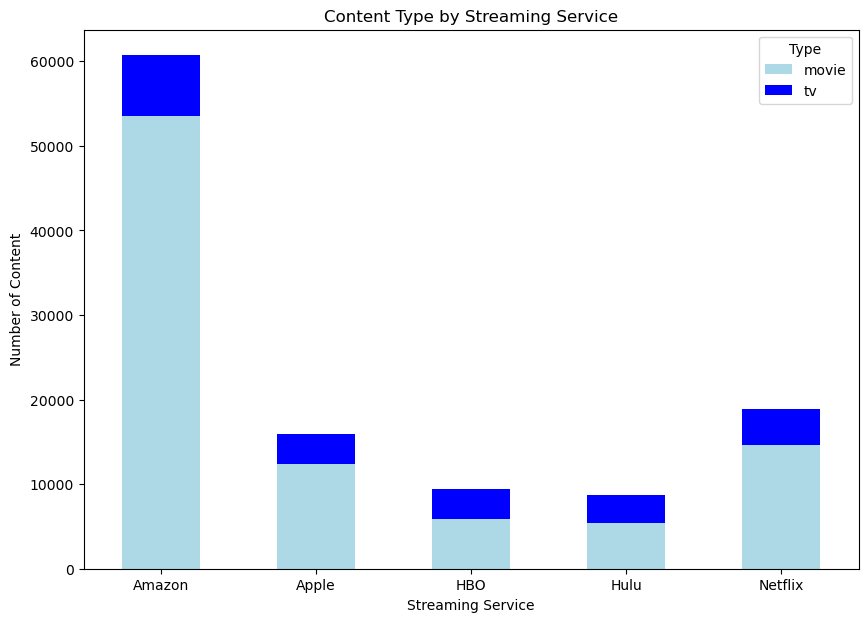

In [133]:
# Plot the data
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightblue', 'blue'])
plt.title('Content Type by Streaming Service')
plt.ylabel('Number of Content')
plt.xlabel('Streaming Service')
plt.xticks(rotation=0)

# Save the plot
plt.savefig("../Images/Content_Type_by_Streaming.png")
plt.show()

**Findings & Analysis: Content Type (Movies vs TV)**

**Which streaming service has the most content?**

* It can be seen here that Amazon Prime has the most content by type on their streaming platform. However, when reviewing all the data, there is a clear disproportion in movie libraries vs TV shows. 

**Why does Amazon Prime have the most content by type?**
* It can be concluded and observed that Amazon Prime's catalog of both movies and TV shows is extensive. They offer both free movies and TV shows (original content and otherwise) through their streaming service 'Prime Video' when paid for in the 'Prime Subscription’, which varies in cost. However, you can still access other movies and TV shows by purchasing or renting them for a fee. Whereas other streaming services make you subscribe to a plan, and you receive "free" content through there.

**Is this a positive or negative when looking at a streaming service such as Amazon Prime and Prime Video?**
* Yes, and no. The reason for this is that you pay for a subscription service and receive original content through Prime Video, but if you want to access movies or other titles, you have to either rent or buy them. This can add up and become costly over time for the average consumer. However, the plus side to all of this is that all content is in one place. You can 'subscribe' to other streaming services through Prime Video (i.e., Paramount Plus, PBS, Masterpiece, Showtime, Discovery +, AMC, etc.), and you can even have access to HBO Max content. Altogether, these are separate streaming services that you would have to pay for and download an app to receive content. Whereas Amazon Prime Video makes it so all the content is within one streaming service. 


So, is this worth it? And how is this successful for the streaming service? Let's take a look further. 

#### IMDB Average Rating 

In [101]:
# IMDB average rating for each streaming service 
imdb_rating = all_data.groupby("Streaming Service")["IMDB Average Rating"].mean().reset_index()
imdb_rating

,Streaming Service,IMDB Average Rating
0,Amazon,5.953446
1,Apple,6.385585
2,HBO,6.688892
3,Hulu,6.566648
4,Netflix,6.398585


In [102]:
# Print which is the highest rated streaming service
highest_rated = imdb_rating.loc[imdb_rating["IMDB Average Rating"].idxmax()]
print(f"The highest rated streaming service is {highest_rated['Streaming Service']} with an average rating of {highest_rated['IMDB Average Rating']}")

The highest rated streaming service is HBO with an average rating of 6.688891506655672


#### Highest Average Rating 

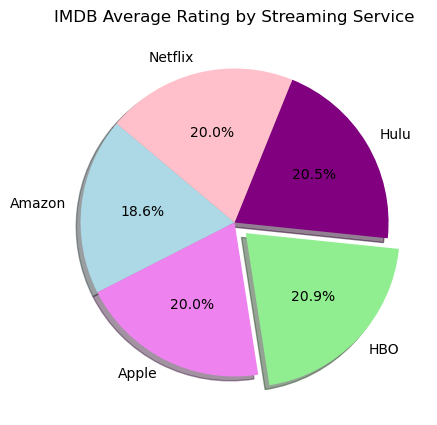

In [103]:
# Create a pie chart of all the streaming services to show which one has the highest average rating IMDB rating
imdb_rating.plot.pie(y="IMDB Average Rating", 
                     labels=imdb_rating["Streaming Service"], 
                     autopct="%1.1f%%", title="IMDB Average Rating by Streaming Service", 
                     figsize=(5, 5), legend=False, shadow=True, explode=(0, 0, 0.1, 0, 0), 
                     startangle=140, colors=["lightblue", "violet", "lightgreen", "purple", "pink"]) 
plt.ylabel('')

# Save the pie chart
plt.savefig("../Images/IMDB_Average_Rating_by_Streaming_Service.png")

**Findings & Analysis: IMDB Rating**

**Which streaming service is most popular based on IMBD rating, and why?**
* It is found that HBO Max has the highest rating overall, at 20.9%. There is a slight margin of difference between the other streaming services, with Hulu falling at 20.5% and Netflix and Apple at 20%. The lowest IMDB rating for a streaming service is Amazon Prime Video at 18.6%. 

* Earlier, we looked at the full cataloge for each streaming service, and it was found that HBO had the least amount of movies and TV shows. Through our research and overall analysis, we concluded that HBO Max most likely has the highest rating due to the 'substance' of the content. What does this mean? Well, HBO Max brings in many Blockbuster movies and highly rated and award-nominated TV shows. The number of content does not always mean the best, as seen here, with Amazon Prime Video ranking in last place. 

* Through the pie chart, we are able to visualize this more clearly and see the differences. 

## Part 3: HBO Max Data Analysis and Visualization 

After determining that HBO Max was the most popular streaming service in regards to the highest IMDB rating, we then took the data given and analyzed it further. Here, we looked at the number of movie and tv shows, the top 10 movies and TV shows, and the most popular genres to better understand why HBO Max out-performed the other streaming services. 

In [104]:
# Statistical Summary for IMDB rating for HBO Max
hbo_data_df["IMDB Average Rating"].describe()

count    8489.000000
mean        6.688892
std         1.040770
min         1.600000
25%         6.100000
50%         6.700000
75%         7.400000
max         9.500000
Name: IMDB Average Rating, dtype: float64

#### Number of Movies and TV Shows for HBO Max

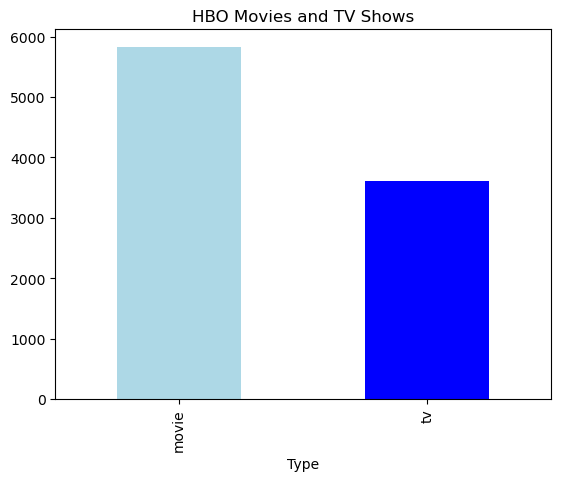

In [105]:
# Create a bar chat to show the number of movies and TV shows for HBO
hbo_data_df["Type"].value_counts().plot(kind="bar", 
                                        title="HBO Movies and TV Shows", 
                                        color=["lightblue", "blue"])

# save the bar chart
plt.savefig("../Images/HBO_Movies_and_TV_Shows.png")

#### Top 10 Genres for Movies 

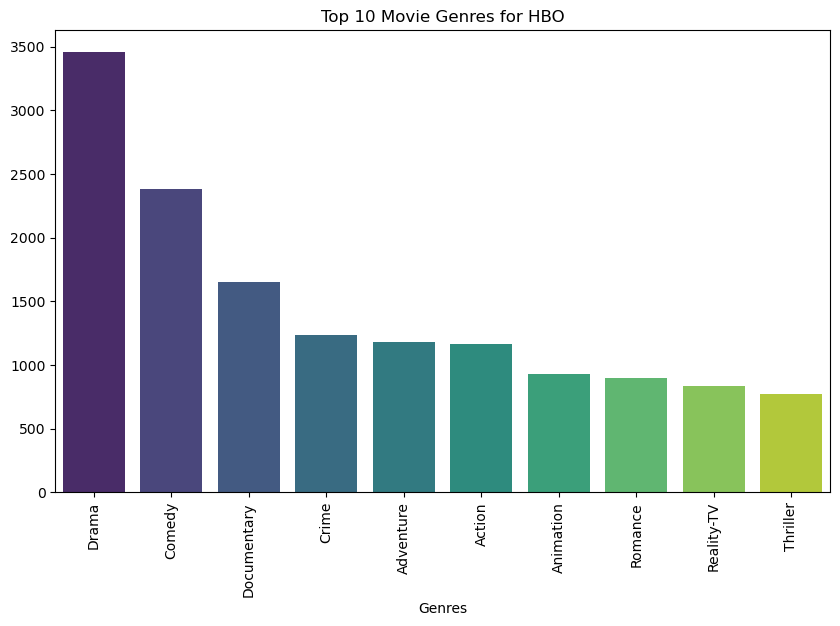

In [134]:
# Filter the data to include only movies
hbo_movies = hbo_data_df[hbo_data_df['Type'] == 'movie']

# Split the by genres and explode the dataframe so each genre has its own row
hbo_genres = hbo_data_df['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in movies for HBO
top_movie_genres = hbo_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for movies for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values, palette="viridis")
plt.title("Top 10 Movie Genres for HBO")
plt.xticks(rotation=90);

# Save the bar chart
plt.savefig("../Images/Top_10_Movie_Genres_HBO.png")
plt.show()


#### Top 10 Genres for TV Shows

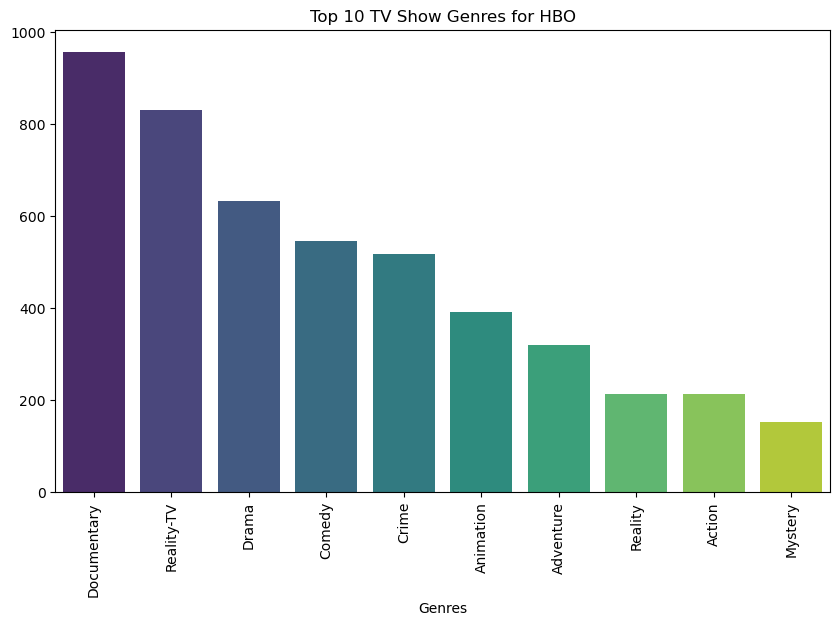

In [135]:
# Filter the data to include only TV shows
hbo_tv = hbo_data_df[hbo_data_df['Type'] == 'tv']

# Split the genres and explode the dataframe so each genre has its own row
hbo_tv_genres = hbo_tv['Genres'].str.split(', ').explode('Genres')

# Get the top 10 genres in TV shows for HBO
top_tv_genres = hbo_tv_genres.value_counts().nlargest(10)

# Plot a bar chart for the top ten genres for TV shows for HBO
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tv_genres.index, y=top_tv_genres.values, palette="viridis")
plt.title("Top 10 TV Show Genres for HBO")
plt.xticks(rotation=90)

# Save the bar chart
plt.savefig("../Images/Top_10_TV_Genres_HBO.png")
plt.show()

#### Top 10 Movies & TV Shows on HBO MAX

In [108]:
# Create a DataFrame for the top 10 movies for HBO to visualize which movies are the most popular
top_10_movies = hbo_movies.nlargest(10, 'IMDB Average Rating')
top_10_movies.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
70,The Shawshank Redemption,movie,Drama,1994.0,9.3,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR...",HBO
5273,Celebrity Habla,movie,Documentary,2009.0,9.3,US,HBO
59,The Godfather,movie,"Crime, Drama",1972.0,9.2,"AD, ES, PT",HBO
27,The Lord of the Rings: The Return of the King,movie,"Adventure, Drama, Fantasy",2003.0,9.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO...",HBO
35,The Dark Knight,movie,"Action, Crime, Drama",2008.0,9.0,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL...",HBO


In [109]:
# Create a DataFrame for the top 10 TV shows
top_10_tv = hbo_tv.nlargest(10, 'IMDB Average Rating')
top_10_tv.head()

,Title,Type,Genres,Release Year,IMDB Average Rating,Available Countries,Streaming Service
8421,Planet Earth II,tv,Documentary,2016.0,9.5,"ID, MY, PH, SG, TH, US",HBO
5972,Band of Brothers,tv,"Action, Drama, History",2001.0,9.4,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL...",HBO
8089,Planet Earth,tv,"Documentary, Family",2006.0,9.4,"ID, MY, PH, SG, TH, US",HBO
5887,The Wire,tv,"Crime, Drama, Thriller",2002.0,9.3,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL...",HBO
6690,Chernobyl,tv,"Drama, History, Thriller",2019.0,9.3,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL...",HBO


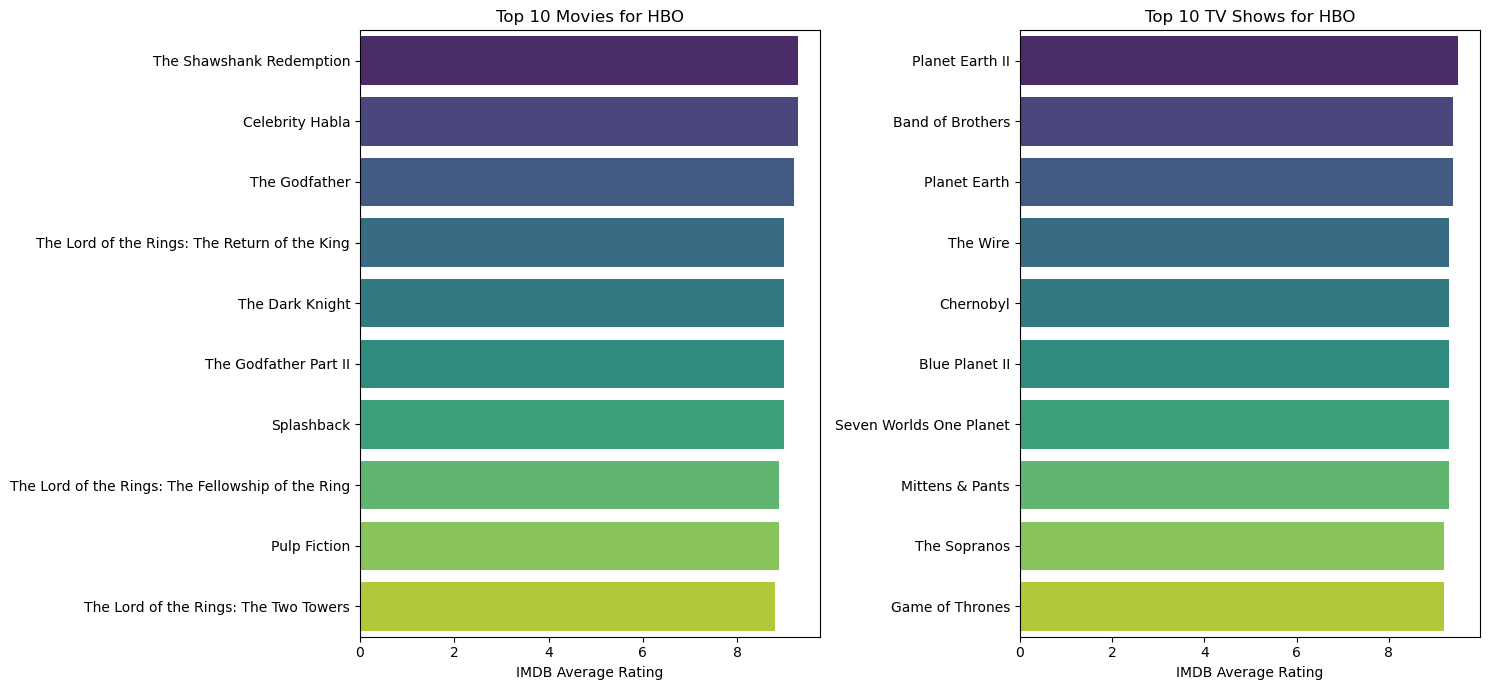

In [138]:
# Plot the top 10 movies and tv shows side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot the top 10 movies
sns.barplot(x='IMDB Average Rating', y='Title', data=top_10_movies, palette='viridis', ax=ax[0])
ax[0].set_title('Top 10 Movies for HBO')
ax[0].set_ylabel('')
ax[0].set_xlabel('IMDB Average Rating')

# Plot the top 10 TV shows
sns.barplot(x='IMDB Average Rating', y='Title', data=top_10_tv, palette='viridis', ax=ax[1])
ax[1].set_title('Top 10 TV Shows for HBO')
ax[1].set_ylabel('')
ax[1].set_xlabel('IMDB Average Rating')

plt.tight_layout()

# Save the bar chart
plt.savefig("../Images/Names_of_Top_10_HBO.png")
plt.show()


In [111]:
# What is the margin of difference between the top 10 movies for HBO?
top_10_movies['IMDB Average Rating'].max() - top_10_movies['IMDB Average Rating'].min()

# What is the margin of difference between the top 10 TV shows for HBO?
top_10_tv['IMDB Average Rating'].max() - top_10_tv['IMDB Average Rating'].min()

print(f'The margin of difference between the top 10 movies for HBO is {top_10_movies["IMDB Average Rating"].max() - top_10_movies["IMDB Average Rating"].min()}')
print(f'The margin of difference between the top 10 TV shows for HBO is {top_10_tv["IMDB Average Rating"].max() - top_10_tv["IMDB Average Rating"].min()}')


The margin of difference between the top 10 movies for HBO is 0.5
The margin of difference between the top 10 TV shows for HBO is 0.3000000000000007


**Findings & Analysis: Genres**

**Top 10 Movie Genres on HBO Max**
* Based on the data recieved, it can be determined that 'Drama' is the highest ranking movie genre with a significant dip in 'Comedy' coming in at second and then 'Documentary'. 

**Top 10 TV Show Genres on HBO Max**
* It can be determined that 'Documentary' is the highest-ranking TV show genre. The next is 'Reality-TV’ and then 'Drama'. 

**Discuss the top 10 movies and TV shows and data correlation. Any significant findings? Why?** 
* The top 10 movies and TV shows were plotted side by side to analyze the different titles. Based on the data received, "The Shawshank Redemption" was the top-rated movie title for HBO. Then 'Celebrity Habla" and "The Godfather". Also, when looking at the data visualization, most of the top 10 movie titles were popular ones. This continues to prove HBO's strategy of investing and providing high-quality, critically acclaimed movies such as "Harry Potter,” "Lord of the Rings,” and "The Dark Knight.” 

* Based on the data received, "Planet Earth II" came in first for most popular TV shows, with "Band of Brothers" in close second and "Plant Eart I" in third. Other popular titles are original HBO TV shows such as "Chernobyl,” "The Sopranos,” and "Game of Thrones.”

* The margin of difference between the top 10 movies was 0.5, and for TV shows, it was 0.3. This goes onto show that for all the top 10 movies and TV shows, they were ranked similarly within IMDB scores. 

## Part 4: Data Visualization of the Least Popular Streaming Service  

Amazon Prime was considered the least popular streaming service based on the data obtained. However, there was not enough data available to us to properly analyze in order to determine how to improve the streaming service. We took the second least popular streaming service, Netflix, and analyzed various aspects of the service to understand better why it is not performing well. Here, we reviewed the data to determine how Netflix can improve in the future and what aspects to look for regarding demographic information (gender, age, location by country, and devices used) and membership analysis (subscription plan and user length). 

A new dataset and CSV file were provided, cleaned, and analyzed. 

In [112]:
# Load new CSV file
netflix_userbase = Path("../Input_csv/Netflix_Userbase.csv")

# Read the CSV file into a DataFrame
netflix_userbase_df = pd.read_csv(netflix_userbase)
netflix_userbase_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [113]:
# Check for NaN values
print("NaN count per column:")
print(netflix_userbase_df.isnull().sum())

# Get rows with NaN
rows_with_nan = netflix_userbase_df[netflix_userbase_df.isnull().any(axis=1)]
print("\nRows with NaN values:")
print(rows_with_nan)

NaN count per column:
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
dtype: int64

Rows with NaN values:
Empty DataFrame
Columns: [User ID, Subscription Type, Monthly Revenue, Join Date, Last Payment Date, Country, Age, Gender, Device]
Index: []


#### Statistical Summary

In [114]:
# Basic statistics summary of the age data
print("\nSummary statistics (age):")

# Calculate the average mean, std, max, and min
age_mean = netflix_userbase_df["Age"].mean()
age_median = netflix_userbase_df["Age"].median()
age_std = netflix_userbase_df["Age"].std()
age_max = netflix_userbase_df["Age"].max()
age_min = netflix_userbase_df["Age"].min()

# Print the summary
print(f"Average Age: {age_mean}")
print(f"Median Age: {age_median}")
print(f"Standard Deviation: {age_std}")
print(f"Max Age: {age_max}")
print(f"Min Age: {age_min}")



Summary statistics (age):
Average Age: 38.7956
Median Age: 39.0
Standard Deviation: 7.171777631644702
Max Age: 51
Min Age: 26


It is interesting to see that the average age is 38 for Netflix users, the minimum age is 27, and the maximum age is 51. This correlates because most people in their 20s and 30s use streaming services, and most later generations find the technology to be difficult to manage. However, we predicted that there would be a lower age range since many college-age young adults use Netflix and streaming services. 

We will review this later on when during data visualization of age in the 'Demographic Information of Netflix Users.'

### Demographic Information on Netflix Users

#### Gender Distribution 

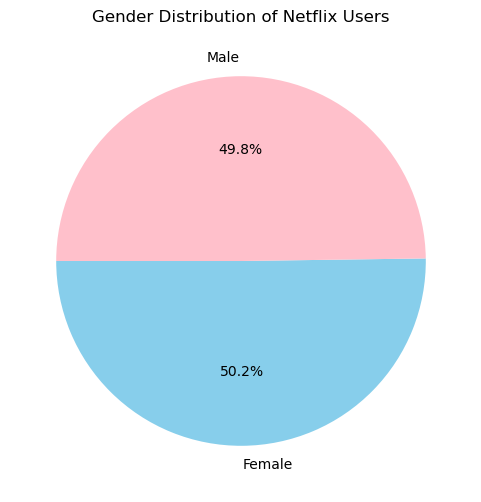

In [139]:
# Gender distribution of Netflix users
gender_distribution = netflix_userbase_df['Gender'].value_counts()

# Create a pie chart for the gender distribution of Netflix users
gender_distribution.plot.pie(labels=gender_distribution.index, autopct='%1.1f%%', 
                             title='Gender Distribution of Netflix Users', 
                             figsize=(6, 6), legend=False, startangle=180, 
                             colors=['skyblue', 'pink'])
plt.ylabel('')

# Save the pie chart
plt.savefig("../Images/Gender_Distribution_of_Netflix_Users.png")

**Discussion: Gender Distribution of Netflix Users**

The data shows that 50.3% of females use Netflix, contrasting the 49.7% of male viewers and streamers. Why is that? Well, it can be assumed that with the rise of Reality-TV shows and more content originals on Netflix, they favor towards a female audience. 

#### Age Distribution 

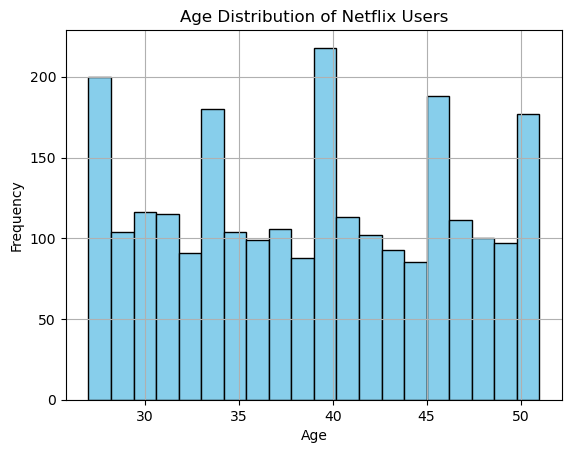

In [140]:
# Create a histogram to show the age distribution of Netflix users
plt.hist(netflix_userbase_df['Age'], bins=20, color='skyblue', edgecolor='black')

# Graph properties
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Save the histogram
plt.savefig("../Images/Age_Distribution_of_Netflix_Users.png")
plt.show()

In [117]:
# What is the average distribution of Netflix users
average_age = netflix_userbase_df['Age'].mean()
print(f"The average age of Netflix users is {average_age}")

The average age of Netflix users is 38.7956


**Findings & Analysis: Age of Netflix Users**

**Discussion of Summary of Statistics (as seen above) and data visualization and correlation**
* Based on the data, the average age is 38 years old. While the minimum age is 27 and the maximum is 51. As discussed earlier, this tends to correlate simply because most young adults in their 20s use streaming services, and most within the age range of 25-35 grew up with the rise of these types of platforms (i.e., Gen Z). They are most likely to spend money on streaming services, whereas the older generation is more loyal to traditional cable and TV. As the nature of technology increases, it can be found that more and more of the older generation use streaming services. 

* When looking at the histogram, the data shows a 'Ragged Plateau' which means that there is not a clear process or pattern of variation. 

#### Netflix Users by Country 

In [118]:
# Country distribution of Netflix users
country_distribution = netflix_userbase_df['Country'].value_counts()
country_distribution


Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

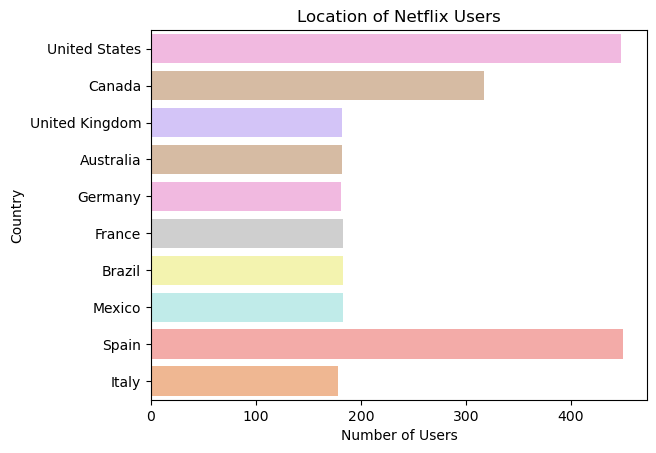

In [148]:
# Analyze the location/country distribution of Netflix users
sns.countplot(y="Country", data=netflix_userbase_df, palette="pastel", 
              order = netflix_userbase_df['Country'], orient="h")
plt.title("Location of Netflix Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")

# Save the bar chart
plt.savefig("../Images/Location_of_Netflix_Users.png")
plt.show()

In [120]:
# Create a new DataFrame for the country counts
country_counts = netflix_userbase_df['Country'].value_counts().reset_index(name='Count')
country_counts.columns = ['Country', 'Count']

# Bubble map using Plotly
fig = px.scatter_geo(country_counts, locations="Country", locationmode='country names', size="Count", hover_name="Country", title="Netflix Users by Country", projection="natural earth")
fig.show()

**Findings & Analysis: Location of Netflix Users**

**Discussion of data visualization and correlation of the top 10 countries**
* It can be seen that the United States has the most number of Netflix users based on the select data provided. This correlates since Netflix started in the States. The second most poplar country is Spane and then Canada. There is a significant dip in users in the UK, Australia, Germany, France, Brazil, Mexico, and Italy. 

#### Devices Used by Netflix Users 

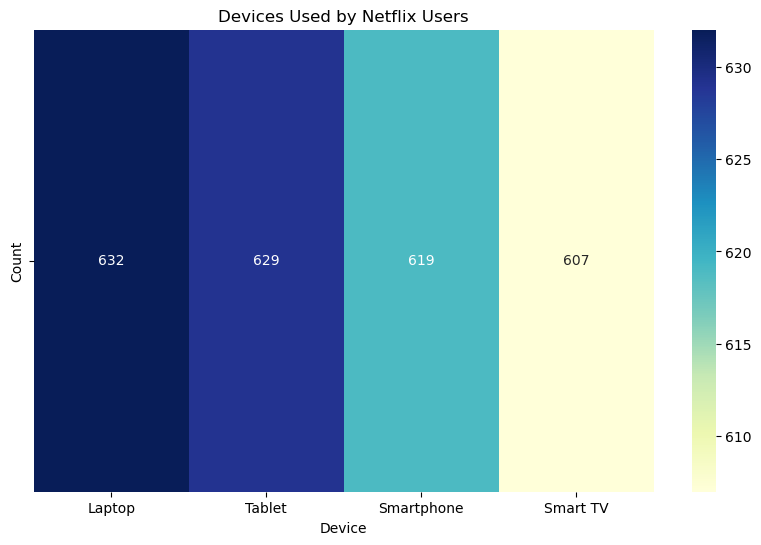

In [149]:
# Devices used by Netflix users
device_distribution = netflix_userbase_df['Device'].value_counts().reset_index()
device_distribution.columns = ['Device', 'Count']

# Create a heat map for the devices used
plt.figure(figsize=(10, 6))
sns.heatmap(device_distribution.set_index('Device').T, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Devices Used by Netflix Users')
plt.xlabel('Device')
plt.ylabel('')

# Save the heat map
plt.savefig("../Images/Devices_Used_by_Netflix_Users.png")

# Show the plot
plt.show()

**Findings & Analysis: Devices Used by Netflix Users**

**Discussion of data visualization and correlation**
* It can be seen that the laptop is the most popular device used, with the tablet as a close second. It is interesting to note that a Smart TV is last with the number of users in the dataset. We assumed that it would have more since most people watch streaming services on their TVs. 

### Membership Analysis of Netflix Users

In [122]:
# Analyze the membership length of Netflix users
netflix_userbase_df['Join Date'] = pd.to_datetime(netflix_userbase_df['Join Date'])
netflix_userbase_df['Last Payment Date'] = pd.to_datetime(netflix_userbase_df['Last Payment Date'])

# Calculate the membership length
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Last Payment Date'] - netflix_userbase_df['Join Date']
netflix_userbase_df['Membership Length'] = netflix_userbase_df['Membership Length'].dt.days

print(f'The average membership length of Netflix users is {netflix_userbase_df["Membership Length"].mean()} days')

The average membership length of Netflix users is 326.102 days


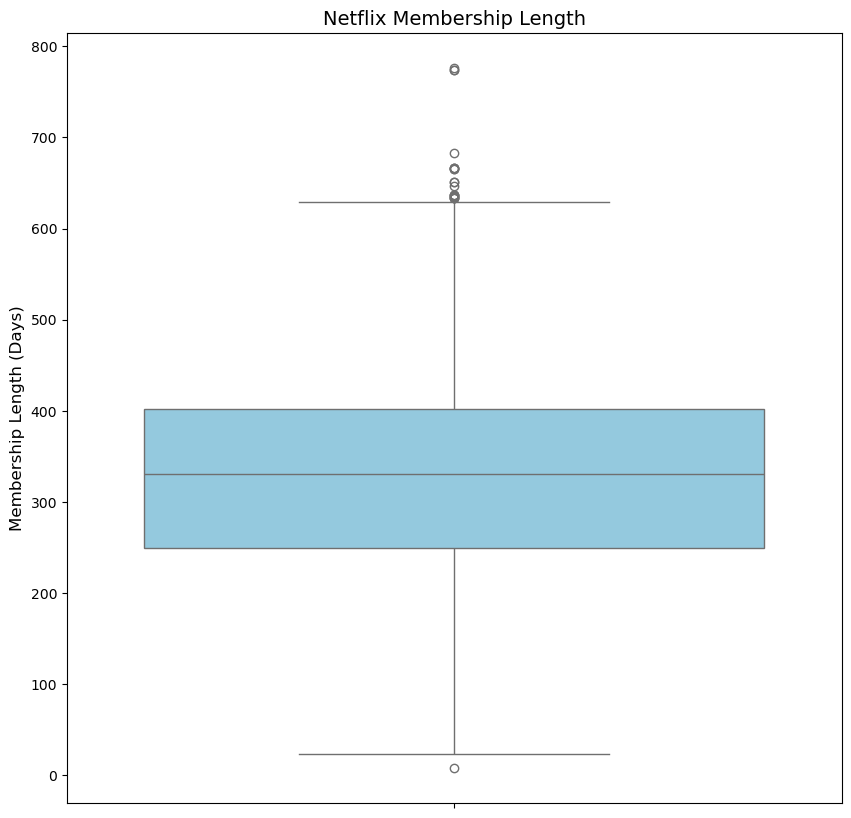

In [150]:
# Data Visualization
# Filter out negative membership lengths
netflix_userbase_df = netflix_userbase_df[netflix_userbase_df['Membership Length'] >= 0]

# Create a box and whisker plot for the membership length of Netflix users
plt.figure(figsize=(10, 10))
sns.boxplot(y=netflix_userbase_df['Membership Length'], color='skyblue')
plt.title('Netflix Membership Length', fontsize=14)
plt.ylabel('Membership Length (Days)', fontsize=12)

# Save the box and whisker plot
plt.savefig("../Images/Netflix_Membership_Length.png")

# Show the plot
plt.show()


**Findings & Analysis: Netflix Membership Length**

**Discussion of data visualization and correlation**
* Based on the data, the average membership length is 326 days. When looking at the Wisker plot, it was interpreted that most people cancel their subscription close to a year into their service. Why is that? Well, most subscription services increase their rates around a year into service. Again, the number of streaming services adds up over time, and the average American has found it hard to maintain the added fees and price increases over time.

#### Subscription Plan Type of Netflix Users

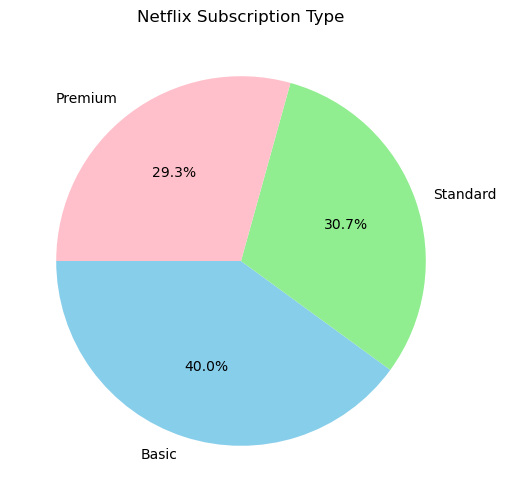

In [130]:
# Analyze the subscription plan of Netflix users
subscription_plan = netflix_userbase_df['Subscription Type'].value_counts().reset_index()
subscription_plan.columns = ['Subscription Type', 'Count']

# Create a pie chart for the subscription plan of Netflix users
subscription_plan.plot.pie(y='Count', labels=subscription_plan['Subscription Type'], autopct='%1.1f%%', 
                          title='Netflix Subscription Type', figsize=(6, 6), legend=False, startangle=180, 
                          colors=['skyblue', 'lightgreen', 'pink'])
plt.ylabel('')

# Save the pie chart
plt.savefig("../Images/Netflix_Subscription_Type.png")
plt.show()

**Findings & Analysis: Netflix Subscription Type**

**Discussion of data visualization and correlation**
* It is interpreted that the 'Basic' subscription plan is the most popular at 40%, with 'Standard' coming in second at 30.7%, and last with 'Premium' at 29.3%. Why is this? Well, again, as mentioned above, cost is one of the main factors. 

Sources: Data was extracted from Kaggle(2025) from OctopusTeam Dataset. All data maintained and developed from OctopusTeam. Data was used for educational purposes only.